In [21]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv(r"C:\Users\GAYATHRI\OneDrive\Documents\NovaConnect\dataset.csv")

In [23]:
#How does the data look like?
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5490,2676-OXPPQ,Male,0,No,No,6,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.70,335.65,No
2940,6313-GIDIT,Male,1,No,No,53,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55,Yes
4523,9518-XXBXE,Male,1,Yes,No,10,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,75.30,720.45,No
6527,7551-DACSP,Male,0,Yes,Yes,6,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.30,324.25,Yes
4291,2789-CZANW,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),110.30,6997.3,No


In [24]:
#How many rows and columns does the dataset have?
data.shape

(7043, 21)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
#Changing the Total Charges column to a float type column since it should be a numeric column
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [27]:
#rechecking data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [28]:
#Formatting the column names
data.rename(columns={"customerID":"CustomerID", "gender":"Gender", "tenure":"Tenure"},inplace=True)
data.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
#How many missing values are present in the dataset?
data.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
data[data["TotalCharges"].isnull()]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


All the rows that have NaN values for Total Charges also have Tenure as 0, which indicates that these customers are new.

Since Total Charges = Tenure x Monthly Charges, we can impute these null values with 0, since tenure is 0.

In [31]:
data['TotalCharges']=data['TotalCharges'].fillna(0)
data.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
#Are there duplicate values?
data.duplicated().sum()

np.int64(0)

In [34]:
data.corr(numeric_only=True)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
Tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [35]:
#Splitting the data into two types - numeric data and categorical data
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(exclude=np.number)
data_cat=data_cat.drop('CustomerID',axis=1)

####  Univariate Analysis

Categorical Data

Churn
No     5174
Yes    1869
Name: count, dtype: int64

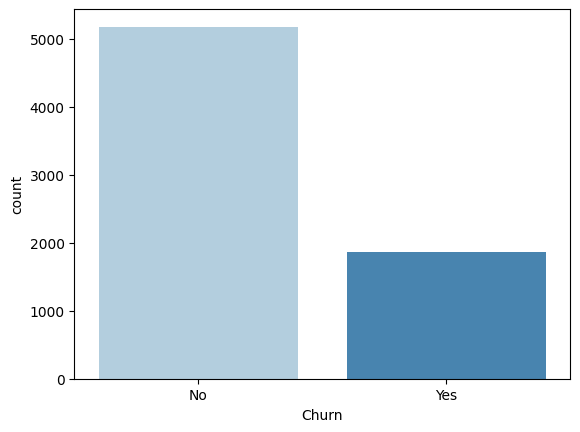

In [36]:
#Target variable distribution
sb.countplot(data_cat,x='Churn',hue='Churn',palette='Blues',legend=False)
data['Churn'].value_counts()

-> Out of all customers, 73.4% remained with the company (non-churners) while 26.6% discontinued their service (churners). This indicates that more than a quarter of the customer base is leaving.


-> This also shows that the target variable is imbalanced.

In [37]:
#how many unique values are there in each categorical feature
data_cat.nunique()

Gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [38]:
#counts of each unique value for each categorical feature
categorical_counts = {}

for col in data_cat:
    counts = data[col].value_counts()
    categorical_counts[col] = {k: int(v) for k, v in counts.items()}

categorical_counts

{'Gender': {'Male': 3555, 'Female': 3488},
 'Partner': {'No': 3641, 'Yes': 3402},
 'Dependents': {'No': 4933, 'Yes': 2110},
 'PhoneService': {'Yes': 6361, 'No': 682},
 'MultipleLines': {'No': 3390, 'Yes': 2971, 'No phone service': 682},
 'InternetService': {'Fiber optic': 3096, 'DSL': 2421, 'No': 1526},
 'OnlineSecurity': {'No': 3498, 'Yes': 2019, 'No internet service': 1526},
 'OnlineBackup': {'No': 3088, 'Yes': 2429, 'No internet service': 1526},
 'DeviceProtection': {'No': 3095, 'Yes': 2422, 'No internet service': 1526},
 'TechSupport': {'No': 3473, 'Yes': 2044, 'No internet service': 1526},
 'StreamingTV': {'No': 2810, 'Yes': 2707, 'No internet service': 1526},
 'StreamingMovies': {'No': 2785, 'Yes': 2732, 'No internet service': 1526},
 'Contract': {'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473},
 'PaperlessBilling': {'Yes': 4171, 'No': 2872},
 'PaymentMethod': {'Electronic check': 2365,
  'Mailed check': 1612,
  'Bank transfer (automatic)': 1544,
  'Credit card (autom

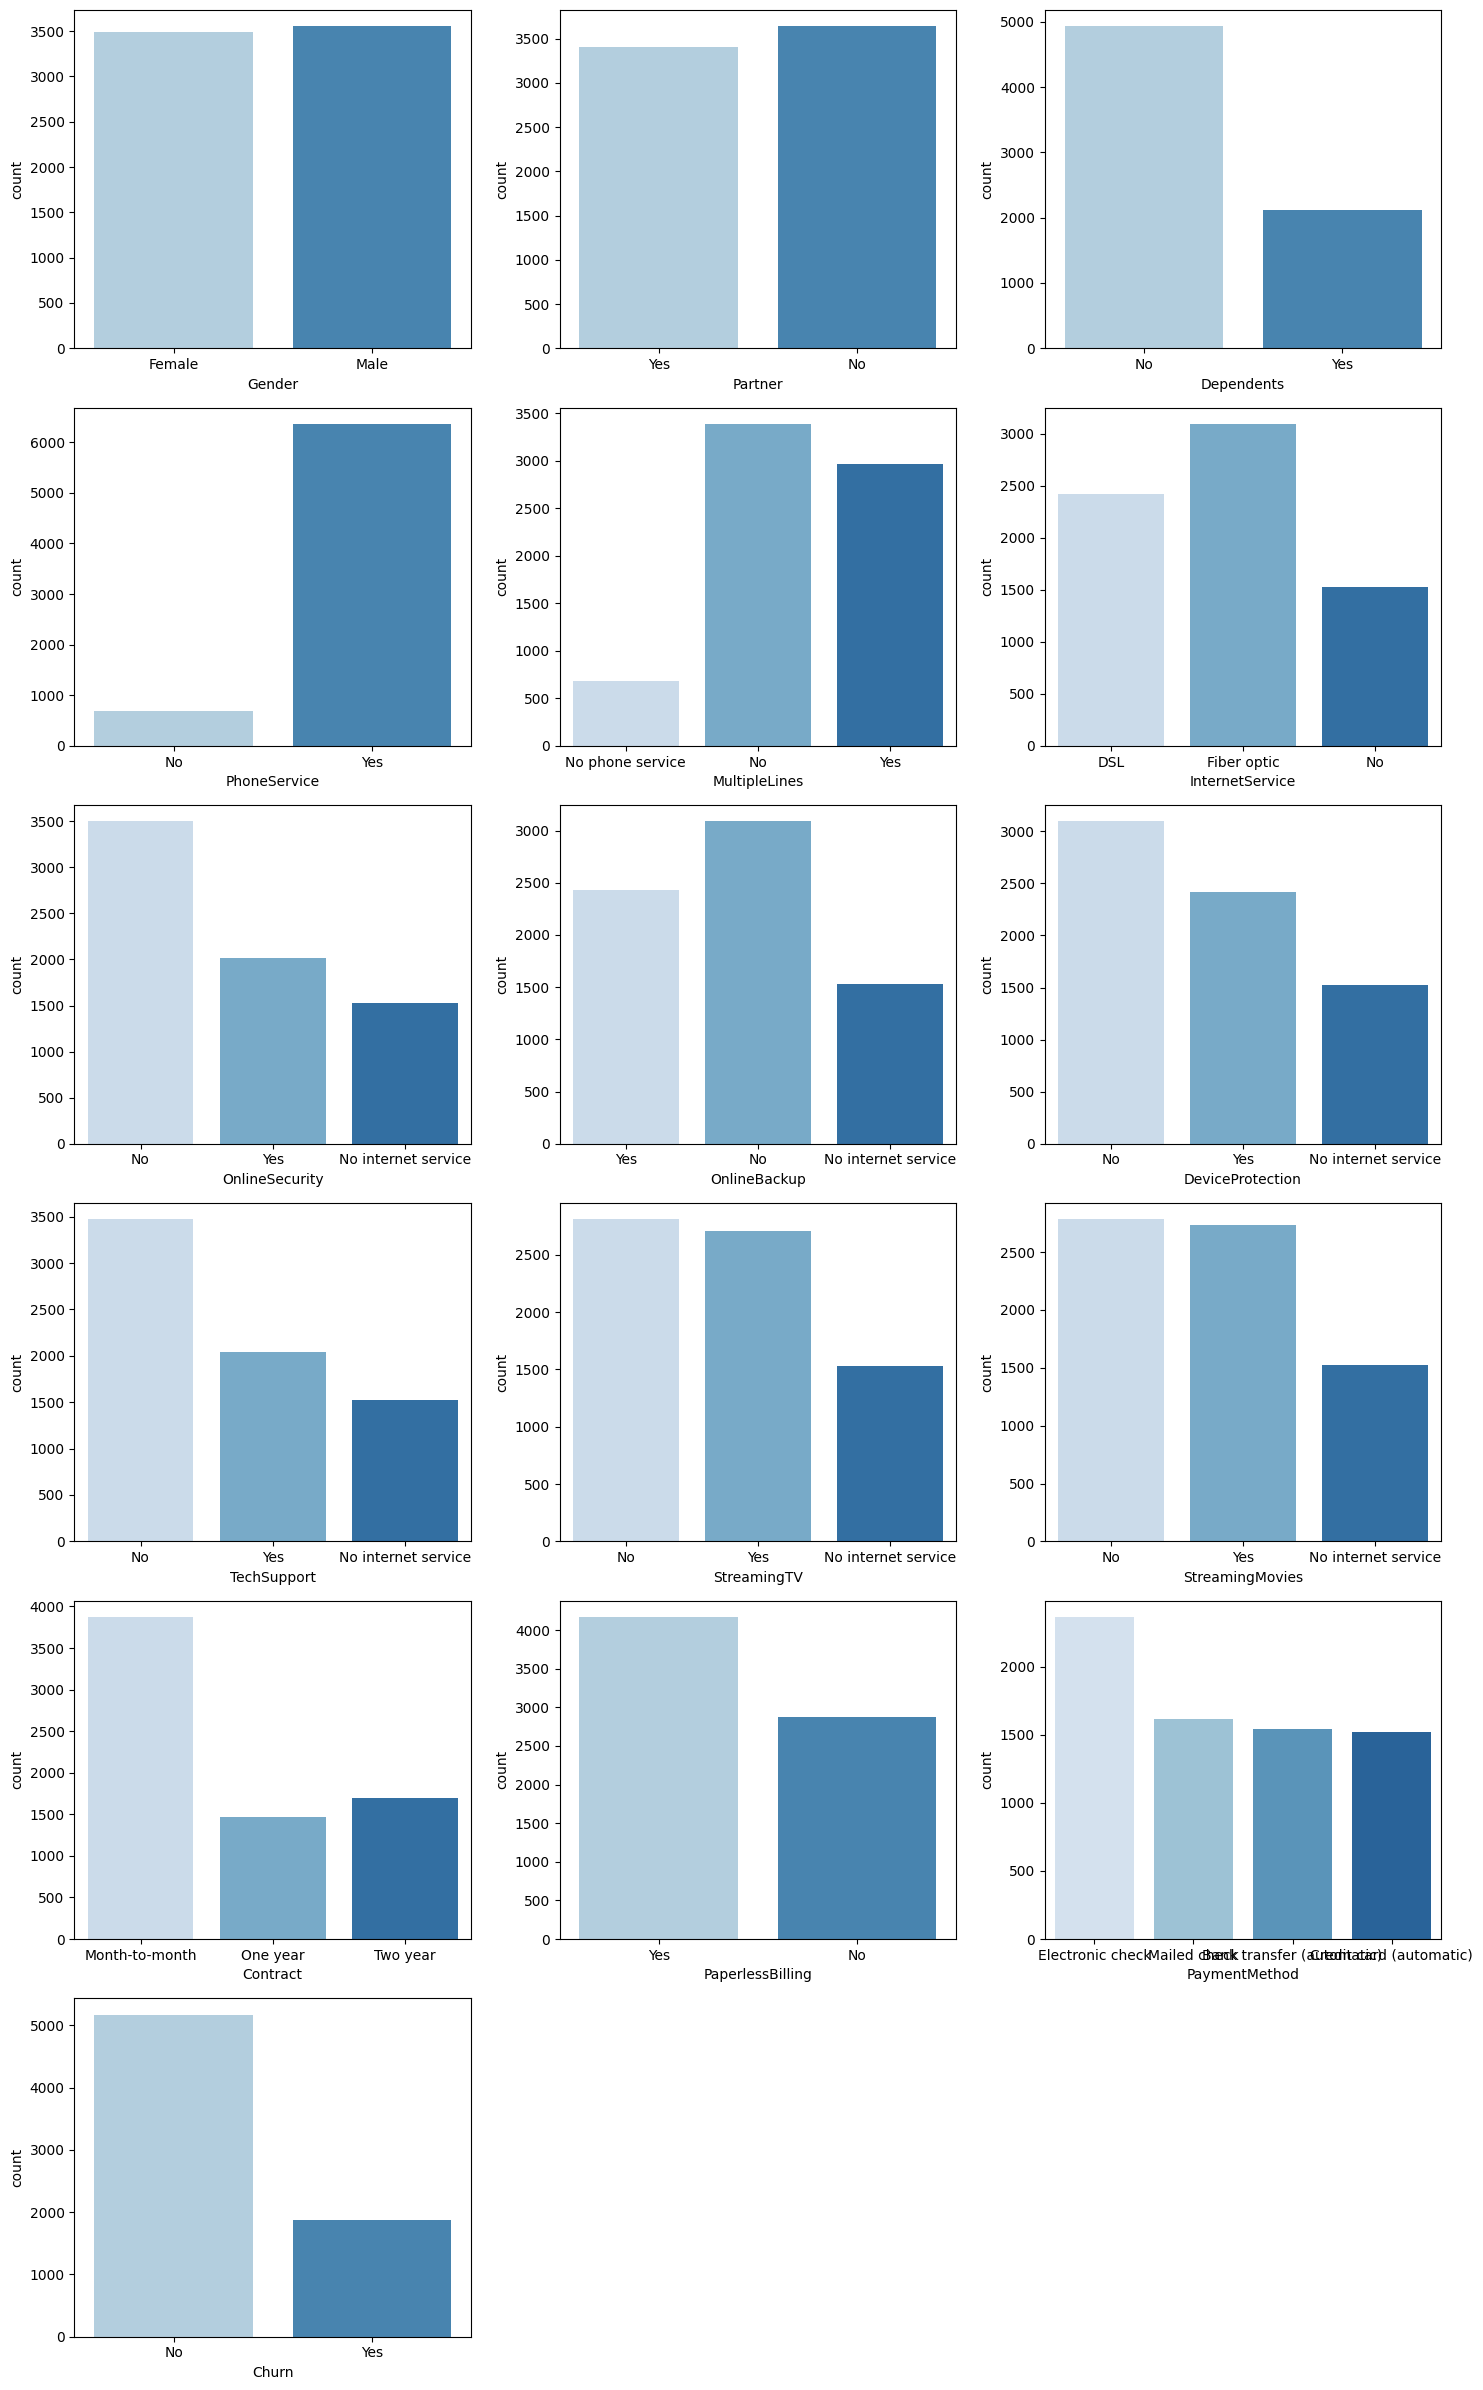

In [39]:
#Distribution of categorical variables

# Number of categorical variables
n_cols = 3  # plots per row
n_rows = (len(data_cat.columns) + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axs = axs.flatten()

# Plot each categorical column
for i, col in enumerate(data_cat.columns):
    sb.countplot(data=data_cat, x=col, hue=col, ax=axs[i], palette='Blues')
    axs[i].tick_params(axis='x', rotation=360)

# Remove unused axes if any
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


C:\Users\GAYATHRI\AppData\Local\Temp\ipykernel_9876\3170222183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data['PaymentMethod'],palette='Blues')


<Axes: xlabel='count', ylabel='PaymentMethod'>

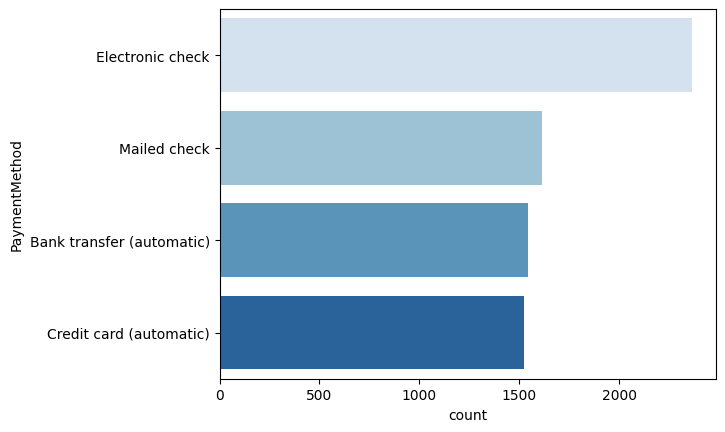

In [40]:
sb.countplot(data['PaymentMethod'],palette='Blues')

-> More than 2000 customers favour the Electronic Check form of payment method. 

->Mailed Check, Bank Transfers and Credit Cards are all more or less similar in terms of popularity, given that the no of customers that pay through these 3 are just over 1500. 

Numerical Data


In [41]:
#Creating a dataframe for summary statistics for numerical features
summ = pd.DataFrame()
summ

""


In [42]:
summ['Mean'] = data_num.mean()
summ['Median'] = data_num.median()
summ['Minimum'] = data_num.min()
summ['Max'] = data_num.max()
summ['25th percentile']=data_num.quantile(0.25)
summ['75th percentile']=data_num.quantile(0.75)
summ['Std Dev'] = data_num.std()
summ['Skew'] = data_num.skew()
summ['Kurtosis'] = data_num.kurtosis()
summ['Coeff of Variance']=data_num.std()/data_num.mean()*100

In [43]:
summ

,Mean,Median,Minimum,Max,25th percentile,75th percentile,Std Dev,Skew,Kurtosis,Coeff of Variance
SeniorCitizen,0.162147,0.00,0.00,1.00,0.00,0.00,0.368612,1.833633,1.362596,227.332009
Tenure,32.371149,29.00,0.00,72.00,9.00,55.00,24.559481,0.239540,-1.387372,75.868426
MonthlyCharges,64.761692,70.35,18.25,118.75,35.50,89.85,30.090047,-0.220524,-1.257260,46.462725
TotalCharges,2279.734304,1394.55,0.00,8684.80,398.55,3786.60,2266.794470,0.963235,-0.228580,99.432397


-> The average tenure for a customer is 32 months with customers distributed across all stages of tenure(widespread). The highest tenure is 72 months.

-> Average monthly charges are ~$65 and average total charges are ~$2280 with customers widespread across different levels($0-$8684).

<Axes: xlabel='TotalCharges', ylabel='Count'>

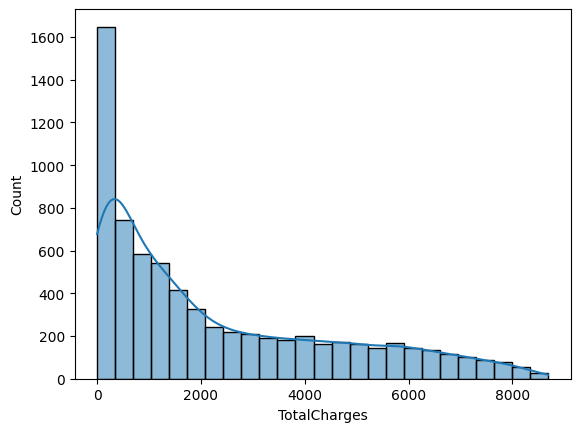

In [44]:
sb.histplot(data['TotalCharges'],kde=True)

<Axes: xlabel='Tenure', ylabel='Count'>

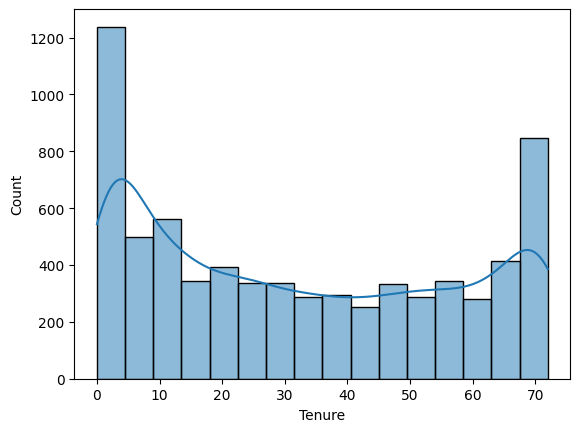

In [45]:
sb.histplot(data['Tenure'],kde=True)

-> The huge spike in the beginning(0-5 months) shows a lot of new customers joining, but the distribution dips suggesting that a lot of these don't continue with the service. 

-> Between 10-60 months, customers are fairly distributed with no huge peaks.

-> There is another peak towards 70 months, indicating a not so small segment of loyal customers.

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

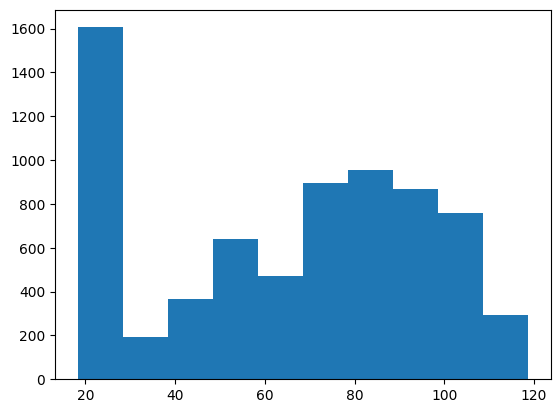

In [46]:
plt.hist(data['MonthlyCharges'])

<Axes: ylabel='Tenure'>

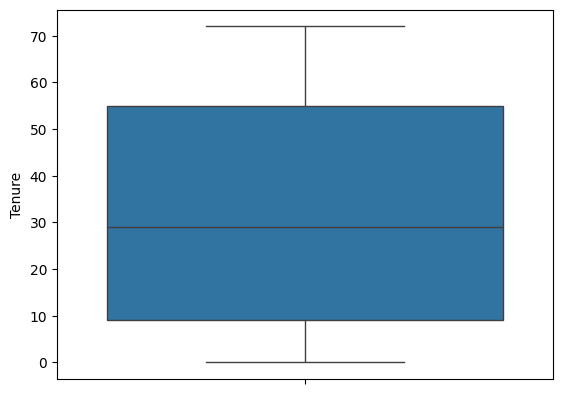

In [47]:
sb.boxplot(data['Tenure'])

<Axes: ylabel='MonthlyCharges'>

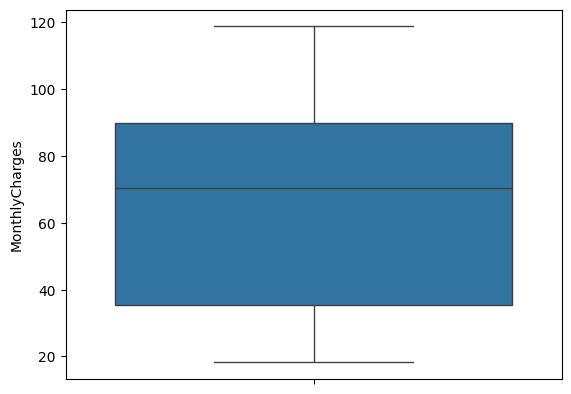

In [48]:
sb.boxplot(data['MonthlyCharges'])

<Axes: ylabel='TotalCharges'>

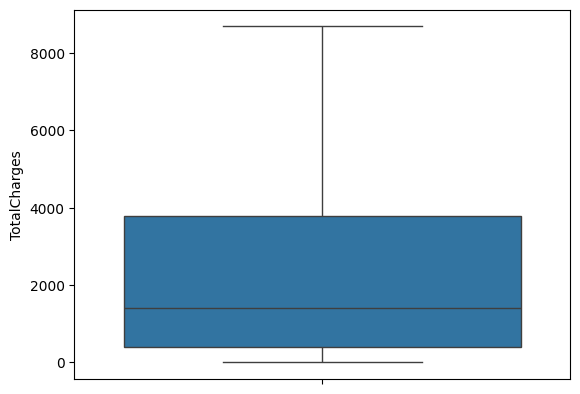

In [49]:
sb.boxplot(data['TotalCharges'])

### Bivariate Analysis

Correlation

<Axes: >

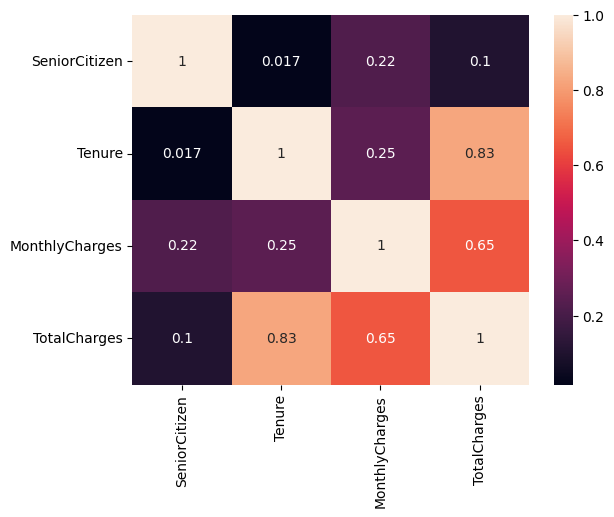

In [50]:
corr = data_num.corr()
sb.heatmap(corr, annot=True)

We can garner the following insights from the table above:

-> The longer the customer stays, the higher the total charges(Tenure - TotalCharges ~ 0.82) indicating that customer retention directly drives revenue.

-> Monthly Charges - Total Charges ~ 0.65 : Customers with higher monthly charges contribute more to total charges.

-> Tenure - Monthly Charges ~  0.24 & Senior Citizen - Monthly Charges ~ 0.22 show weak positive correlations, indicating only slightly higher monthly charges in both cases.

Both Tenure and Monthly Charges play a significant role in the movement of Total Charges.

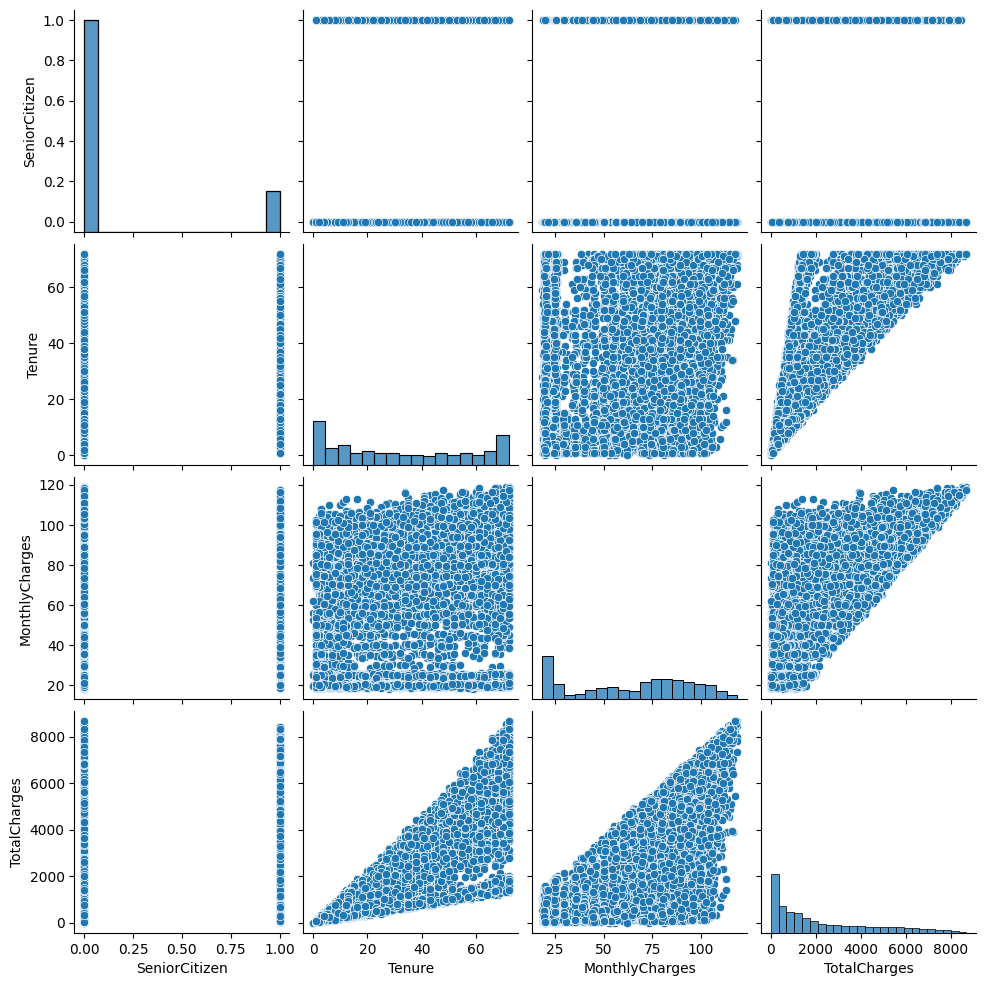

In [51]:
#visualizing the relationship between the numerical features
sb.pairplot(data_num)

1. Tenure ↔ TotalCharges : Longer-tenure customers contribute much higher total revenue.
2. MonthlyCharges ↔ TotalCharges : Customers with higher monthly charges also contribute more overall but the time factor of it all still matters.
3. Tenure ↔ MonthlyCharges: No strong relationship seems to be present, there are long tenure customers that stick to cheaper plans.
4. Whether the customer is a senior citizen or not has very little to do with Tenure or TotalCharges, indicating age group alone doesn’t explain much on retention or revenue patterns.

##### Churn Vs Numerical Features

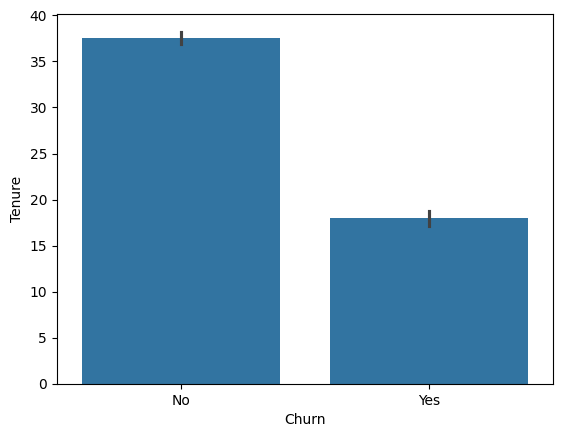

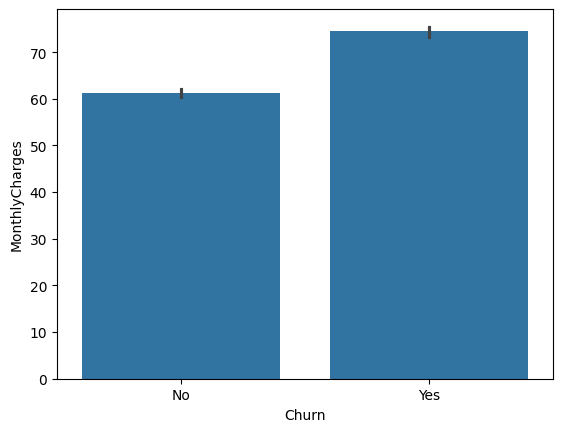

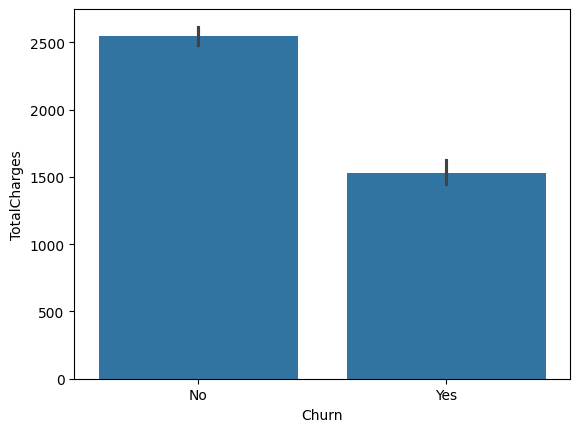

In [52]:
#visualising the relationship between the numerical columns and churn
num_cols = ['Tenure','MonthlyCharges','TotalCharges']

for col in num_cols:
    sb.barplot(x='Churn',y=col,data=data)
    plt.show()

<Axes: xlabel='Churn', ylabel='TotalCharges'>

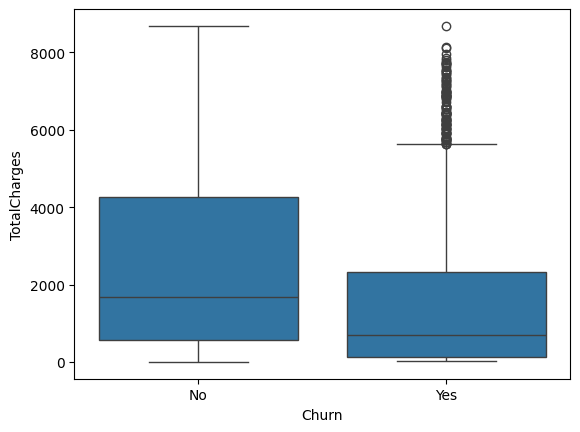

In [53]:
#Visualizing the relationship between Total Charges and Churn using a boxplot
sb.boxplot(x=data['Churn'],y=data['TotalCharges'])

In [54]:
data.groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


-> Those who are loyal to the company have an average of $1683 as total charges and those who left had an average of $703.

-> Another observation is that customers who had higher monthly plans have churned.

-> 75% of the churners pay <= $2331.30 whereas 75% of the non-churners pay <= $4262, showing that the upper quartile of non-churners is almost double that of churners.

->Customers that have higher total charges have stayed loyal to NovaConnect but those that have lower total charges seem to have stopped using the services offered by the company. Churn is concentrated among newer customers, though there are churners that pay a lot.

-> NovaConnect has been able to retain customers that have stayed with them longer, than those whose tenures are shorter

In [55]:
data.groupby('Churn')['Tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


-> The typical churner stays less than a year (~10 months), while non churners stay for more than 3 years (38 months).

-> A quarter of the churners leave within the first 2 months.

-> While there are high tenure churners(~2.5 years), they don't seem as loyal to the high tenure non-churners(~5 years).

We can see that most of the churning happens in the first few years.


##### Churn vs Categorical Features

In [56]:
contract_tab = pd.crosstab(data_cat['Contract'], data_cat['Churn'], normalize='index') * 100 
contract_tab

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


<Axes: xlabel='Contract'>

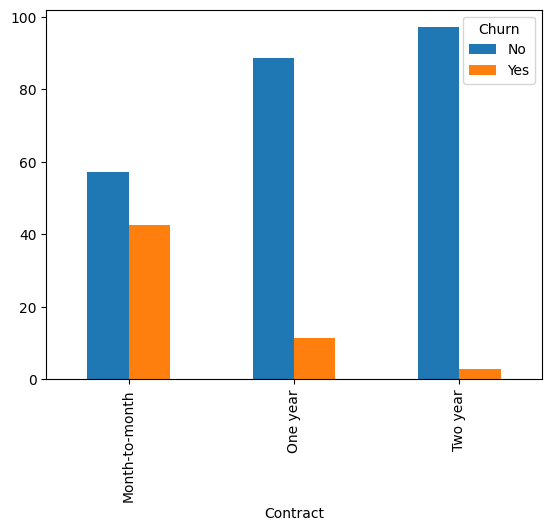

In [57]:
#visualizing the table above using a barplot
contract_tab.plot(kind='bar')

-> Month-to-Month customers churn the most (~42%)

Longer contracts have less risk of churn, showing that longer commitments indicate strong loyalty. Most of the churn is happening among the shorter contracts.

<Axes: xlabel='PaymentMethod'>

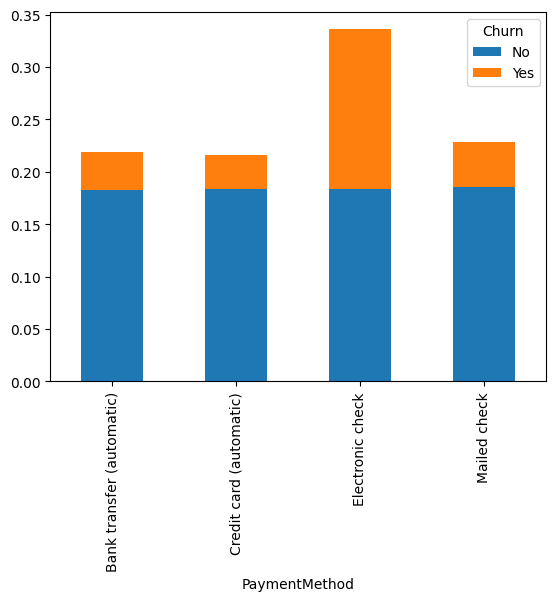

In [58]:
#Payment Method Vs Churn
pd.crosstab(data_cat['PaymentMethod'],data_cat['Churn'],normalize=True).plot(kind='bar',stacked='True')

In [59]:
pd.crosstab(data_cat['PaymentMethod'],data_cat['Churn'],normalize='index')*100

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


->There is a 45% churn rate among customers that use electronic check for payment, which is higher than any other payment method.

-> Automatic payments (Bank Transfer & Credit Card) have the lowest risk of churn, which could be because the payment requires less effort.

-> There is also a loyal customer base among those that use mailed checks for payment (80%), while the churn rate is slightly higher than the automatic payments but far lower than electronic checks.



<Axes: xlabel='Churn', ylabel='InternetService'>

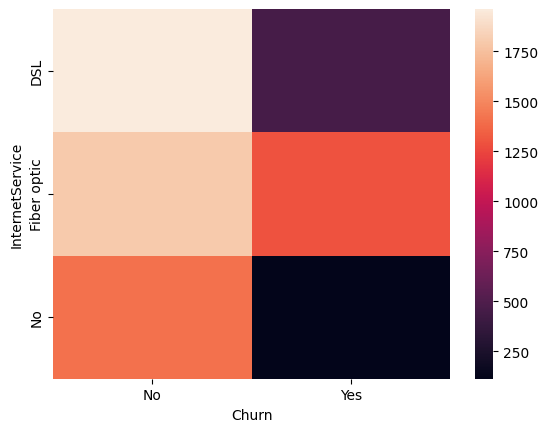

In [60]:
#Internet Service Vs Churn
sb.heatmap(pd.crosstab(data_cat['InternetService'],data_cat['Churn']))

-> Fiber Optic users churn more than no internet or DSL users.

-> DSL users seem to have the lowest risk of churning. 

While there is comparatively high churn among Fiber Optic users, they also have a higher amount of loyal customers, being not far behind DSL.

In [61]:
pd.crosstab(data_cat['OnlineSecurity'],data_cat['Churn'],normalize='index')

Churn,No,Yes
OnlineSecurity,,
No,0.582333,0.417667
No internet service,0.925950,0.074050
Yes,0.853888,0.146112


Users that have no online security churn the most (42%) while those that have no internet service or have online security have more committed users.

Multivariate Analysis

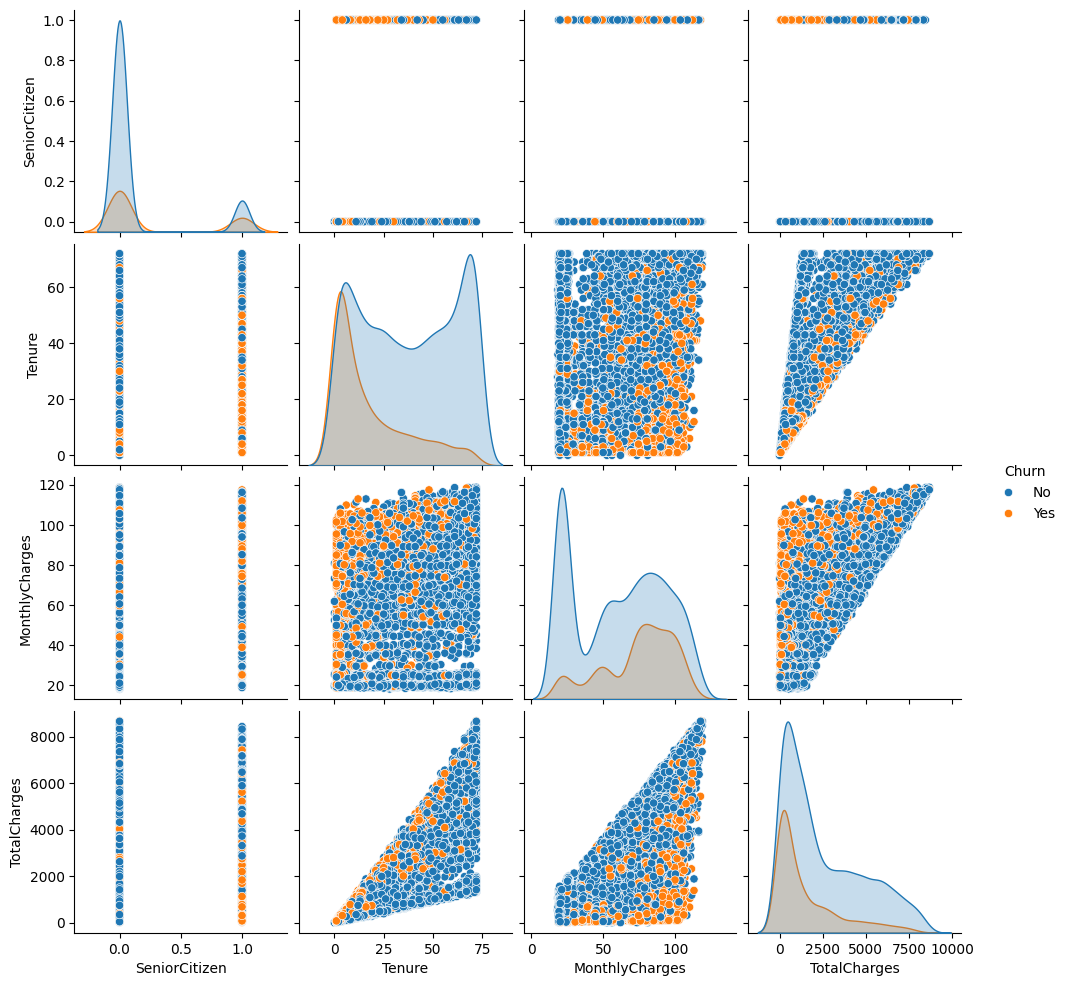

In [62]:
#Visualizing how churn is affected by numerical features
sb.pairplot(data,hue='Churn')

-> Most of the churning is happening when the monthly charges are high(70-110), tenure is less than 2 years(0-20 months) and total charges are on the lower side(~2500 dollars). This indicates that newer customers paying high monthly plans don't stick longer and bring in less revenue (since total charges = monthly charges x tenure)

-> The loyal customers tend to be the ones that stay for more than 2 years (>40 months), who mostly pay lower or moderate charges but there are high payment users too, tying it all down to loyalty. These are the customers that generate the most revenue.

-> There are slighly higher no of churners among those users who are senior citizens, having a weak but noticeable effect.

In [63]:
pd.pivot_table(data,index=['PaymentMethod','PaperlessBilling'],columns='Churn',values='TotalCharges',aggfunc='median'
)

Churn                                             No       Yes
PaymentMethod             PaperlessBilling                    
Bank transfer (automatic) No                1830.050   818.350
                          Yes               3665.550  1872.775
Credit card (automatic)   No                1787.275  1327.650
                          Yes               3557.075  1541.500
Electronic check          No                1348.500   387.500
                          Yes               2263.450   758.600
Mailed check              No                 481.100    76.350
                          Yes                816.800   156.350

In [64]:
#How does the type of internet service in monthly plans affect churn?
pd.pivot_table(data,index='InternetService',columns='Churn',values='MonthlyCharges')

Churn,No,Yes
InternetService,,
DSL,60.212105,49.083224
Fiber optic,93.932379,88.126484
No,21.136058,20.368142


In [65]:
pd.crosstab(data['InternetService'],data['Churn'],normalize='index')*100

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


From the above, it seems that factors other than cost might play a crucial role that lead to churn (service or quality related issues maybe) as the difference in average monthly charges between churners and non-churners are not wide.

We already know that Fiber Optic users churn the most (~42%), but we also see that the average monthly charges paid by churners and non-churners don't differ by much, so it could be something else that leads to the risk of churning.

In [66]:
#How would the contract type affect the Fiber Optic users and their risk of churn?
pd.crosstab(data[data['InternetService']=='Fiber optic']['Contract'],
            data[data['InternetService']=='Fiber optic']['Churn'], normalize='index')*100


Churn,No,Yes
Contract,,
Month-to-month,45.394737,54.605263
One year,80.705009,19.294991
Two year,92.773893,7.226107


Those on a month to month contract churn the highest(54%), which locks in our previous observation that newer customers have higher risk of churning.

<Axes: xlabel='Contract', ylabel='Tenure'>

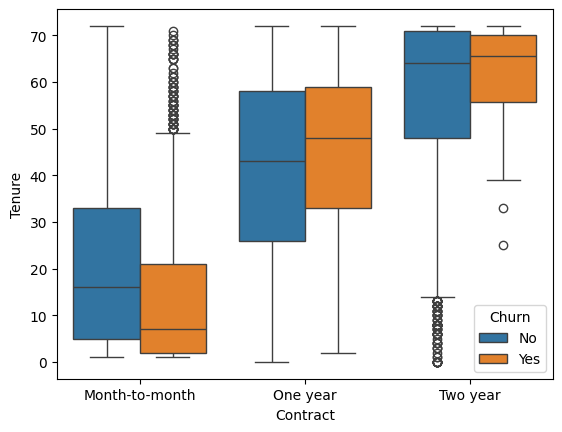

In [67]:
sb.boxplot(x=data['Contract'],y=data['Tenure'],hue=data['Churn'])

In [68]:
pd.crosstab(data['Contract'], data['Churn'], normalize='index') * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


1. Month-to-Month: High churn risk(~43%) because customers can leave anytime(between 2 & 20 months) due to shorter commitments.

2. One year: Churn risk(11%) lower than month-to-month(~11%) as tenure is comparatively higher.

3. Two year: Churn risk is lowest(~3%) as churners stay longer.



In [69]:
pd.pivot_table(data,index='OnlineSecurity',columns='Churn',values='Tenure')

Churn,No,Yes
OnlineSecurity,,
No,32.559647,16.496920
No internet service,32.331210,8.238938
Yes,47.783643,29.050847


-> Churners that have no online security tend to leave quite early(within an average of 16 months)

-> Those that have online security stay for more than 2 years on average.

-> Those that have no internet service have the lowest churn(avg of 8 months) since they are not in need of online security.

Online security helps retain customers, increasing the churners tenures by double.



Is churn associated with gender?  

Using Chi-Square Test of Independence, we are going to test if these two are dependent:

Null Hypothesis(Ho): Gender and Churn are independent (i.e,there is no association between them)

Alternative Hypothesis(H1): Gender and Churn are dependent (i.e,there is no association between them)

In [70]:
#pip install scipy
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(data['Gender'],data['Churn'])

chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)

print(crosstab)
print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"p_value:{p_value:.4f}")


alpha = 0.05
if p_value<alpha:
    print("\n Reject H0: Gender and Churn are dependent")
else:
    print("\n Failed to reject H0: Gender and Churn are independent")
    

Churn     No  Yes
Gender           
Female  2549  939
Male    2625  930

Chi-Square Statistic: 0.4841
p_value:0.4866

 Failed to reject H0: Gender and Churn are independent


We can say that gender is not an important factor for determining churn risk

Objective: To test if churn differs with contract type.

Null Hypothesis(Ho): Contract and Churn are independent (i.e,there is no association between them)

Alternative Hypothesis(H1): Contract and Churn are dependent (i.e,there is no association between them)

In [71]:
#pip install scipy
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(data['Contract'],data['Churn'])

chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)

print(crosstab)
print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"p_value:{p_value:.4f}")


alpha = 0.05
if p_value<alpha:
    print("\n Reject H0: Contract and Churn are dependent")
else:
    print("\n Failed to reject H0: Contract and Churn are independent")

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

Chi-Square Statistic: 1184.5966
p_value:0.0000

 Reject H0: Contract and Churn are dependent


Objective: To test if churn differs with contract type.

Null Hypothesis(Ho): Tech Support and Churn are independent (i.e,there is no association between them)

Alternative Hypothesis(H1): Tech Support and Churn are dependent (i.e,there is no association between them)

In [72]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(data['TechSupport'],data['Churn'])

chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)

print(crosstab)
print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"p_value:{p_value:.4f}")


alpha = 0.05
if p_value<alpha:
    print("\n Reject H0: Tech support and Churn are dependent")
else:
    print("\n Failed to reject H0: Tech Support and Churn are independent")

Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310

Chi-Square Statistic: 828.1971
p_value:0.0000

 Reject H0: Tech support and Churn are dependent


Conclusion: Tech Support does have an impact on churn, even if it is less than the impact from Contract type, indicating that customers that recieve no tech support churn quite a bit (~42%)

Conclusion: Contract type has a very strong impact on churn.

While we have found churners are mostly concentrated among customers whose tenures are shorter(<20 months), so we can check whether the average tenures between churners and non-churners differ using two sample t-test.

Objective: To check if average tenure differ between churners and non-churners

Churn has two levels - Yes, No

H0: Average tenure of churners equal to the average tenure of non-churners

H1: Average tenure of churners is not equal to the average tenure of non-churners

In [73]:
from scipy import stats
alpha = 0.05

churners = data[data['Churn']=='Yes']['Tenure']
non_churners = data[data['Churn']=='No']['Tenure']

t_stat,p_value=stats.ttest_ind(churners,non_churners)

print(p_value)

if p_value < alpha:
    print('\n Reject null hypothesis, Average tenure of churners != Average tenure of non-churners')
    
else:
    print('\n Failed to reject null hypothesis: Average tenure of churners = Average tenure of non-churners')


7.99905796059022e-205

 Reject null hypothesis, Average tenure of churners != Average tenure of non-churners


Conclusion: Average tenure differs between churners and non-churners.

Objective: To check if average monthly charges differ between the churners and non-churners

H0: Average monthly charges of churners = Average monthly charges of non-churners

H1: Average monthly charges of churners != Average monthly charges of non-churners

In [74]:
alpha = 0.05

churners = data[data['Churn']=='Yes']['MonthlyCharges']
non_churners = data[data['Churn']=='No']['MonthlyCharges']

t_stat,p_value=stats.ttest_ind(churners,non_churners)

print(p_value)

if p_value < alpha:
    print('\n Reject null hypothesis, Average monthly charges of churners != Average monthly charges of non-churners')
    
else:
    print('\n Failed to reject null hypothesis: Average monthly charges of churners = Average monthly charges of non-churners')


2.7066456068884154e-60

 Reject null hypothesis, Average monthly charges of churners != Average monthly charges of non-churners


Conclusion: The monthly charges affect the risk of churn, with the risk being higher when monthly plans are high.

### Data Preprocessing

#### Encoding

In [75]:
data_cat.columns

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [76]:
data_cat.nunique()

Gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [77]:
#encoding
data['Gender']=data_cat['Gender'].replace({'Female':1,'Male':0})
data['Partner']=data_cat['Partner'].replace({'Yes':1,'No':0})
data['Dependents']=data_cat['Dependents'].replace({'Yes':1,'No':0})
data['PhoneService']=data_cat['PhoneService'].replace({'Yes':1,'No':0})
data['PaperlessBilling']=data_cat['PaperlessBilling'].replace({'Yes':1,'No':0})
data.head(2)

C:\Users\GAYATHRI\AppData\Local\Temp\ipykernel_9876\1680558374.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']=data_cat['Gender'].replace({'Female':1,'Male':0})
C:\Users\GAYATHRI\AppData\Local\Temp\ipykernel_9876\1680558374.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Partner']=data_cat['Partner'].replace({'Yes':1,'No':0})
C:\Users\GAYATHRI\AppData\Local\Temp\ipykernel_9876\1680558374.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No


In [78]:
#label encoding for churn
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le=LabelEncoder()
data['Churn'] = le.fit_transform(data_cat['Churn'])
data.head(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [79]:
#ordinal encoding for contract column
od=OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
data['Contract']=od.fit_transform(data_cat[['Contract']])

In [80]:
#ohe for other nominal columns
data = pd.get_dummies(data, columns=['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies'],dtype=int,drop_first=True)

In [81]:
data.head(2)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,0,1,0,0.0,1,Electronic check,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,1.0,0,Mailed check,...,0,0,0,1,0,0,0,0,0,0


In [82]:
#frequency encoding for Payment Method because of high cardinality compared to other columns
tab = data['PaymentMethod'].value_counts(normalize=True)
data['PaymentMethod']=tab.apply(data['PaymentMethod'])

#### Scaling

In [83]:
data = data.drop('CustomerID',axis=1)
inp = data.drop('Churn',axis=1)
outp = data['Churn']

In [84]:
#Scaling the input data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc = pd.DataFrame(inp_sc)
inp_sc.columns=inp.columns
inp_sc.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [85]:
inp_sc.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.828207,0.829798,1.401637,-1.160323,...,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,0.371271,-1.205113,-0.572968,-0.259629,...,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.828207,0.829798,-0.572968,-0.362660,...,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.371271,-1.205113,-0.751286,-0.746535,...,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.828207,0.829798,1.401637,0.197365,...,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607


##### Handling Imbalanced class

In [86]:
from imblearn.over_sampling import SMOTE #importing SMOTE
smote = SMOTE(sampling_strategy=0.9)
inp_sc_res, outp_res = smote.fit_resample(inp_sc,outp)

outp_res.value_counts()


c:\Users\GAYATHRI\OneDrive\Desktop\anaconda\envs\gaproj\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Churn
0    5174
1    4656
Name: count, dtype: int64

In [87]:
#renaming the input and output
X = inp_sc_res
y = outp_res

### Model Building

In [88]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=48)

In [89]:
#
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,roc_auc_score
def classify(model,x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=48)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    #metrics : how good is the model?
    cv_score = cross_val_score(model,x,y,cv=10,scoring='f1')
    print('Accuracy:',accuracy_score(ytest,ypred))
    print('Recall:',recall_score(ytest,ypred))
    print('Precision:',precision_score(ytest,ypred))
    print('f1score',f1_score(ytest,ypred))
    print("CV_score:",np.mean(cv_score))
    
    #is the model overfitting?
    var_err=cv_score.std()/cv_score.mean()*100
    print('Variance Error',var_err,'%')
    
    

#### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy: 0.7884028484231943
Recall: 0.8129851799576571
Precision: 0.7624090006618134
f1score 0.7868852459016393
CV_score: 0.7733709060314068
Variance Error 2.0166705903207265 %


#### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy: 0.7744998304510003
Recall: 0.7501764290755116
Precision: 0.7736535662299855
f1score 0.7617341454675743
CV_score: 0.7616619108496872
Variance Error 10.633708885987128 %


#### Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy: 0.8480840963038319
Recall: 0.8299223712067749
Precision: 0.8503253796095445
f1score 0.84
CV_score: 0.8354705763741361
Variance Error 8.80416559624532 %


In [93]:
# Is the model overfitting or underfitting?
y_train_pred = model.predict(xtrain) #training output preds
y_test_pred = model.predict(xtest) #test output pred 

print("Train F1:", f1_score(ytrain, y_train_pred))
print("Test F1:", f1_score(ytest, y_test_pred))

Train F1: 0.9987661937075879
Test F1: 0.84


Hyperparameter tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 120, 130],
    'max_depth': [8,9],
    'min_samples_split': [12,13,15],
    'min_samples_leaf': [4,5],
    'max_features': ['sqrt'],
    'criterion': ['gini'],
    'bootstrap': [True,False],
    'class_weight': [None,'balanced']
}

rfc_grid = RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=10,scoring='f1')
rfc_grid.fit(xtrain,ytrain)
print("Best Params:", rfc_grid.best_params_)
print("Best Score:", rfc_grid.best_score_)

Best Params: {'n_estimators': 130, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}
Best Score: 0.8111214059626726


In [95]:
model = RandomForestClassifier(n_estimators= 150, min_samples_split=7, min_samples_leaf=4, max_features = 'sqrt', max_depth=8, criterion = 'gini', bootstrap=True)
classify(model,X,y)

Accuracy: 0.8229908443540183
Recall: 0.8553281580804517
Precision: 0.7926749509483323
f1score 0.8228105906313645
CV_score: 0.8072163726159041
Variance Error 4.86174922383316 %


In [96]:
#confusion matrix
from sklearn.metrics import confusion_matrix
ypred = model.predict(xtest)
cm = confusion_matrix(ytest,ypred)
cm

array([[1215,  317],
       [ 205, 1212]])

Text(50.722222222222214, 0.5, 'Actual')

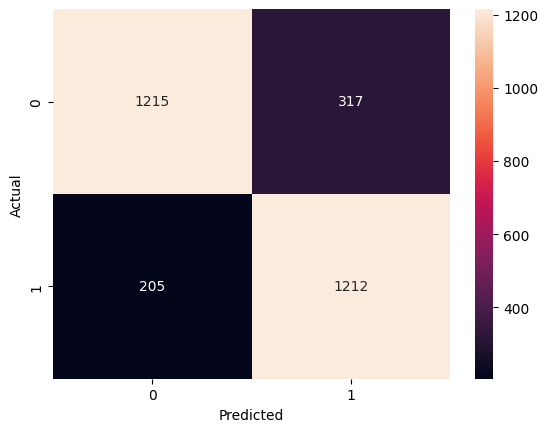

In [97]:
#visualizing the confusion matrix using heatmap
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Given Yes -> 1 and No -> 0, The tuned random forest model's confusion matrix gives the following results:

1218 non-churners were correctly identified (True Negatives)

314 non-churners were wrongly identified as churners (False Positives)

232 churners were identified as non-churners (False Negatives)

1185 churners were correctly identified (True Positive)

In [98]:
#Comparing training and testing f1 scores to see if there is a major difference or not
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)

print("Train F1:", f1_score(ytrain, y_train_pred))
print("Test F1:", f1_score(ytest, y_test_pred))

Train F1: 0.8328168806256455
Test F1: 0.8228105906313645


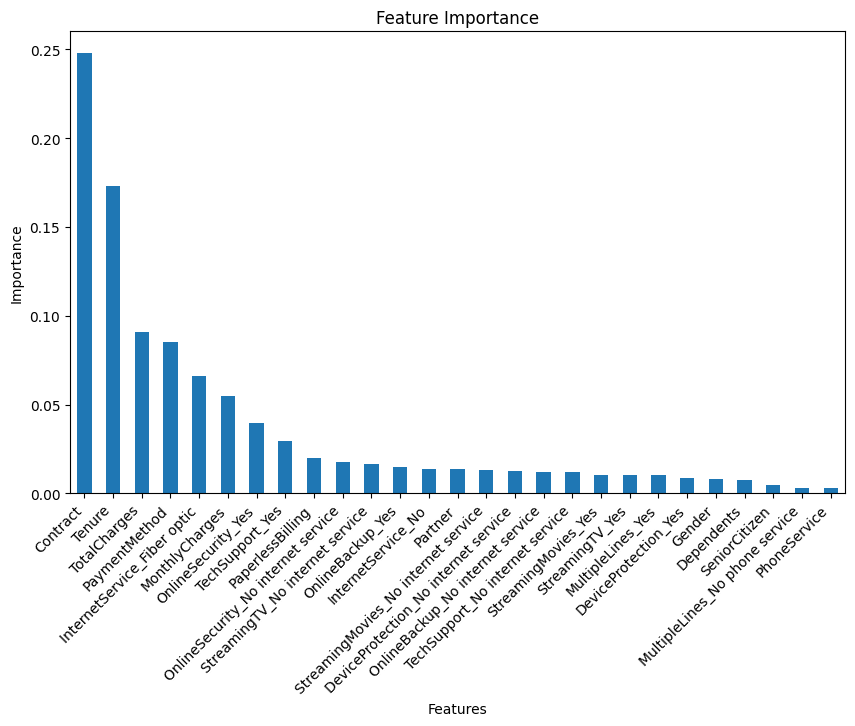

In [99]:
#what features contribute the most towards churn prediction?

#Feature importance and plotting the results
model.feature_importances_
fe = pd.DataFrame()
fe['columns']=xtrain.columns
fe['feature_importance']=model.feature_importances_
fe_sorted=fe.sort_values('feature_importance',ascending=False)

fe_sorted.plot(
    kind='bar',
    x='columns',
    y='feature_importance',
    legend=False,
    figsize=(10,6)
)

plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45, ha='right') 
plt.show()

In [100]:
#Checking the performance of the model with just the top features

top_features = ['Contract','InternetService_Fiber optic','InternetService_No',
                'TotalCharges','PaymentMethod','MonthlyCharges','TechSupport_Yes','TechSupport_No internet service']
xtrain_top = xtrain[top_features]
xtest_top = xtest[top_features]

model.fit(xtrain_top, ytrain)
y_pred_top = model.predict(xtest_top)

print('Accuracy:',accuracy_score(ytest,y_pred_top))
print('Recall:',recall_score(ytest,y_pred_top))
print('Precision:',precision_score(ytest,y_pred_top))
print("F1 score:", f1_score(ytest, y_pred_top))
scores = cross_val_score(model,xtrain_top,ytrain,cv=10,scoring='f1')
var_error=scores.std()/scores.mean()*100
print('Variance Error:',var_error,'%')

Accuracy: 0.814852492370295
Recall: 0.8503881439661256
Precision: 0.7829759584145549
F1 score: 0.8152909336941814
Variance Error: 2.32395683239578 %


#### XgbClassifier

In [101]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model,X,y)

Accuracy: 0.8453713123092573
Recall: 0.8278052223006351
Precision: 0.8469314079422383
f1score 0.8372591006423983
CV_score: 0.8121716684127055
Variance Error 14.144479927641537 %


In [ ]:
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)

print("Training F1:", f1_score(ytrain, y_train_pred))
print("Test F1:", f1_score(ytest, y_test_pred))

Train F1: 0.9395248380129589
Test F1: 0.8372591006423983


In [103]:
#tuning use randomized search cv
param_grid = {'learning_rate':[0.05,0.01],
              'max_depth':[6,7,8,9],
              'subsample':[0.6,0.8],
              'colsample_bytree':[0.5,0.6,0.7,0.8],
              'scale_pos_weight':[2.5,2.7,2.9]
}

xgb_grid = RandomizedSearchCV(model, param_distributions=param_grid, cv=10, scoring='f1')
xgb_grid.fit(xtrain,ytrain)
print("Best Params:", xgb_grid.best_params_)
print("Best Score:", xgb_grid.best_score_)

Best Params: {'subsample': 0.8, 'scale_pos_weight': 2.7, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best Score: 0.8291352925752126


In [104]:
model = XGBClassifier(subsample= 0.6, scale_pos_weight =2.5, max_depth= 8, learning_rate= 0.01, colsample_bytree= 0.8)
classify(model,X,y)

Accuracy: 0.7789081044421838
Recall: 0.9696541990119972
Precision: 0.6928895612708018
f1score 0.808235294117647
CV_score: 0.7928102718875566
Variance Error 2.321602117445736 %


In [ ]:
#difference in train and test performance
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)

print("Training F1:", f1_score(ytrain, y_train_pred))
print("Test F1:", f1_score(ytest, y_test_pred))

Train F1: 0.8183335473103094
Test F1: 0.808235294117647
